# Topic Modelling & Classification on News Articles

## Importing Libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora,models

## Reading BBC News Train CSV File
##### https://www.kaggle.com/competitions/learn-ai-bbc/data?select=BBC+News+Test.csv

In [2]:
df = pd.read_csv('BBC News Train.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


## Pre-Processing

In [3]:
def preprocessing(my_docs):
    corpus = []
    for i in range(0, len(my_docs)):
        review = re.sub(r'\W', ' ', str(my_docs[i]))
        review = review.lower()
        review = review.replace('said','')
        review = review.replace('new','')
        review = re.sub(r'^br$', ' ', review)
        review = re.sub(r'\s+br\s+',' ',review)
        review = re.sub(r'\s+[a-z]\s+', ' ',review)
        pattern = r'[0-9]'
        review = re.sub(pattern, '', review)
        review = re.sub(r'^b\s+', '', review)
        review = re.sub(r'\s+', ' ', review)            
        corpus.append(review)  
    
    #STOPWORD REMOVAL
    for i in range(len(corpus)):
        words = corpus[i].split()                                   
        words = [x for x in words if x not in stopwords.words('english')]         
        corpus[i] = ' '.join(words) 

    return corpus

## Visualization of Each Category

In [4]:
business = df[df['Category'] == 'business' ]
tech = df[df['Category'] == 'tech' ]
politics = df[df['Category'] == 'politics']
sport = df[df['Category'] == 'sport']
entertainment = df[df['Category'] == 'entertainment']

##### Converting Dataframe to List 

In [5]:
business = business['Text'].tolist()
tech = tech['Text'].tolist()
politics = politics['Text'].tolist()
sport = sport['Text'].tolist()
entertainment = entertainment['Text'].tolist()

##### Pre-processing each Category

In [6]:
business = preprocessing(business)
tech = preprocessing(tech)
politics = preprocessing(politics)
sport = preprocessing(sport)
entertainment = preprocessing(entertainment)

##### Visualizing using WordCloud

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordCloud(corpus,name):
    a_long_sentence = ' '.join(corpus)
    wc = WordCloud(background_color='white')              
    wc.generate(a_long_sentence)
    plt.figure(figsize=(10,10))
    print(name, "Words")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")                                    
    plt.show()

Business Words


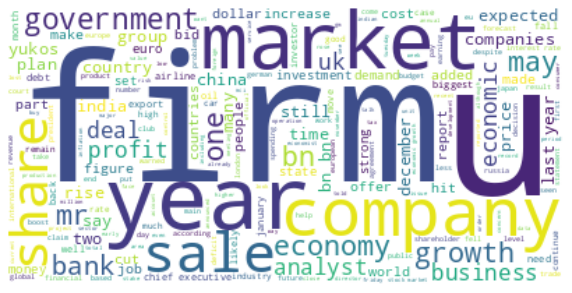

Tech Words


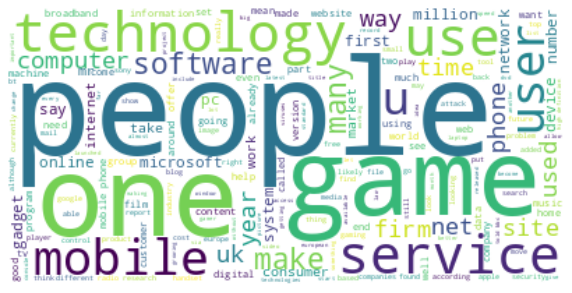

Politics Words


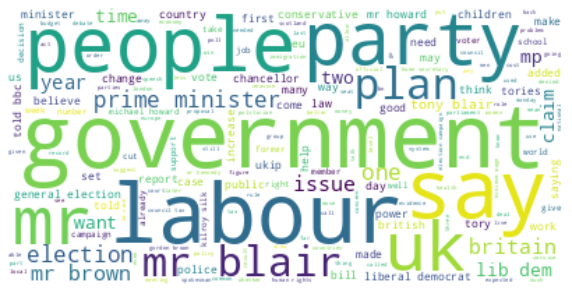

Sport Words


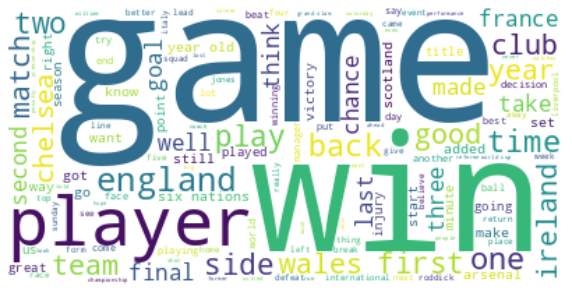

Entertainment Words


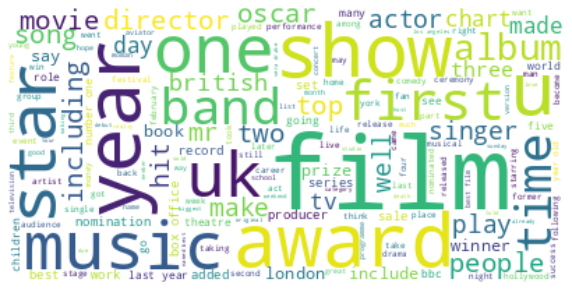

In [8]:
wordCloud(business,'Business')
wordCloud(tech,'Tech')
wordCloud(politics,'Politics')
wordCloud(sport,'Sport')
wordCloud(entertainment,'Entertainment')

## Model Implementation

In [9]:
df = pd.read_csv('BBC News Train.csv')
df = df[['Text']]
df

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
1485,double eviction from big brother model caprice...
1486,dj double act revamp chart show dj duo jk and ...
1487,weak dollar hits reuters revenues at media gro...
1488,apple ipod family expands market apple has exp...


##### Converting the Text Column to List and Pre-processing each Row

In [10]:
my_docs = df['Text'].tolist()
corpus = preprocessing(my_docs)

In [11]:
corpus[0]

'worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness cynthia cooper worldcom ex head internal accounting alerted directors irregular accounting practices us telecoms giant warnings led collapse firm following discovery bn bn accounting fraud mr ebbers pleaded guilty charges fraud conspiracy prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates ms cooper runs consulting business told jury york wednesday external auditors arthur andersen approved worldcom accounting early andersen given green light procedures practices used worldcom mr ebber lawyers unaware fraud arguing auditors alert problems ms cooper also shareholder meetings mr ebbers often passed technical questions company finance chief giving brief answers prosecution star witness former worldcom financial chief scot

##### Tokenization

In [13]:
tokens =[]
for doc in corpus:
    tokens.append(doc.split())

##### Creating the LDA Model

In [14]:
dictionary = corpora.Dictionary(tokens)
print(dictionary)

Dictionary(23392 unique tokens: ['accounting', 'adjustments', 'agreed', 'alert', 'alerted']...)


In [15]:
bow = [dictionary.doc2bow(doc) for doc in tokens]

In [16]:
lda = gensim.models.ldamodel.LdaModel
model = lda(bow, num_topics = 5,id2word = dictionary,passes = 120,random_state=2)

In [17]:
model.print_topics()

[(0,
  '0.009*"bn" + 0.008*"us" + 0.008*"year" + 0.006*"mr" + 0.004*"would" + 0.004*"market" + 0.004*"also" + 0.004*"company" + 0.004*"economy" + 0.004*"growth"'),
 (1,
  '0.010*"people" + 0.005*"mobile" + 0.005*"music" + 0.005*"one" + 0.005*"users" + 0.005*"technology" + 0.005*"also" + 0.004*"net" + 0.004*"phone" + 0.004*"many"'),
 (2,
  '0.015*"mr" + 0.010*"would" + 0.007*"government" + 0.007*"labour" + 0.006*"people" + 0.006*"election" + 0.005*"blair" + 0.005*"party" + 0.004*"also" + 0.004*"could"'),
 (3,
  '0.007*"games" + 0.005*"mr" + 0.005*"would" + 0.004*"also" + 0.004*"game" + 0.004*"year" + 0.004*"could" + 0.004*"one" + 0.004*"people" + 0.003*"us"'),
 (4,
  '0.006*"film" + 0.006*"best" + 0.006*"year" + 0.005*"first" + 0.005*"one" + 0.004*"game" + 0.004*"time" + 0.004*"two" + 0.004*"last" + 0.004*"also"')]

---------------------------------------------------------------------------------------------------------------------------

##### From the above, we can infer that 
##### 0 - Business
##### 1 - Tech
##### 2 - Politics
##### 3 - Sport
##### 4 - Entertainment
##### (There are slight errors)

In [18]:
topic_dict = {0:'Business',1:'Tech',2:'Politics',3:'Sport',4:'Entertainment'}

## Testing on Random Article Content

In [19]:
testDoc = 'house prices rebound says halifax uk house prices increased by 1.1% in december  the first monthly rise since september  the halifax has said.  the uk s biggest mortgage lender said prices rose 15.1% over the whole of 2004  but by only 2.8% in the second half of the year. the average price of a house in the uk now stands at ¬£162 086  halifax said. the survey seems to fly in the face of recent evidence that the uk housing market has been slowing substantially in response to interest rate rises.  last week  the nationwide said that house prices fell 0.2% in december  with annual inflation running at a three year low.  on tuesday  figures from the bank of england showed that the number of mortgages approved in the uk has fallen to the lowest level for nearly a decade. new loans in november fell to 77 000  from 85 000 in october  the lowest rate since september 1995  the bank of england said. growth in unsecured lending  such as personal loans and credit cards  also slowed last month. capital economics  which has in the past predicted a sharp fall in uk house prices  branded halifax s findings a  temporary surprise   which would be reversed over the coming months.  the month by month volatility of the halifax house price data should not distract from the fact that there is a clear downward trend in house prices   a capital economics statement said.  experts believe five interest rate rises since november 2003 are cutting borrowers  appetite for debt.  despite recording a price rise in december  the halifax survey concluded that there was  continuing signs of a genuine slowdown in the housing market.  martin ellis  halifax chief economist  said that there was no need to revise the bank s prediction  made last month  that prices would fall by 2% in 2005.  sound housing market fundamentals will continue to underpin the market in 2005  ensuring that the market remains healthy and that house prices fall only slightly   mr ellis said. if the bank s prediction of a 2% price drop comes true  it will be the first annual fall in nine years.  the bank said that the recent pattern of house prices rising the fastest in the north of england continued in december. in the north west and yorkshire and the humber  halifax said prices rose by 3% and 1.2% in the two regions respectively during the month. at the other send of the scale  prices in the south east and london fell by 1.6% and 0.5% respectively. the biggest decline was seen in wales where prices fell by 6.2%  an area that had experienced strong house price growth during most of 2004. overall  halifax said prices in the final quarter of 2004 were 0.1% higher than in the previous quarter. this was the smallest quarterly rise since the second quarter of 2000  the bank said. as a result  annual house price inflation dipped below 20% during the final few months of 2004.'
testDoc = preprocessing([testDoc])
testBOW = dictionary.doc2bow(str(testDoc).split())
output = model[testBOW]
output 
for tuple in output:
    print(topic_dict[tuple[0]],'-',tuple[1])

Business - 0.9095011
Politics - 0.041765805
Sport - 0.01739158
Entertainment - 0.03055402
